In [724]:
# Importing necessary library
import pandas as pd
import numpy as np
import re
import os


# **Combine all the CSV file to a single DataFrame/CSV**

In [725]:
# Specify the path to the directory containing your CSV files
folder_path = 'C:/Users/vivek/OneDrive/DataScience Project/webscrap/Myntra_webscraping/Dataset/raw_batch'
#folder_path = input("Enter the path to the directory containing your CSV files: ")

# Get a list of all CSV files in the specified directory
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Loop through the list of CSV files and read each into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate the list of DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)




In [726]:
# 'combined_df' contains the data from all CSV files in the specified folder
combined_df.head()

,Product_link,Product_id,Product_Name,Product_Description,Discounted_Price,Original_Price,Discount_Percentage,Fabric_Material,Neck_Type,overall_rating,votes,Customer_Rated_Rating,Customer_Review_Text,Reviewers_Username,Date_of_Review,Reviewers_Product_Images
0,https://www.myntra.com/tshirts/stormborn/storm...,25072090,Stormborn,Graphic Printed Oversized Drop Shoulder Sleeve...,₹549,MRP ₹999,(45% OFF),Cotton,Round Neck,4.2,811,"['5', '5', '5', '5', '5', '5', '4', '4', '4', ...",['Product quality is good but little short for...,"['Prosad Monuru', 'Myntra Customer', 'Debasis'...","['17 Nov 2023', '14 Nov 2023', '21 Nov 2023', ...","['https://assets.myntassets.com/h_150,q_75,w_1..."
1,https://www.myntra.com/tshirts/bullmer/bullmer...,24014326,BULLMER,Graphic Printed Round Neck Oversized Cotton T-...,₹389,MRP ₹1499,(74% OFF),Cotton,Round Neck,3.7,1.2k,"['5', '2', '4', '1', '2', '3', '3', '3', '5', ...",['The size correct fit and ok quality value fo...,"['Ram Prasath', 'Rashi', 'Ankush Thakur', 'Sha...","['7 Nov 2023', '1 Sept 2023', '29 Dec 2023', '...","['https://assets.myntassets.com/h_150,q_75,w_1..."
2,https://www.myntra.com/tshirts/force+nxt/force...,25916872,Force NXT,Men Solid Pack of 2 Super Combed Cotton Henley...,₹778,MRP ₹1198,(35% OFF),Cotton,Henley Neck,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.myntra.com/tshirts/urbano+fashion/...,12377258,Urbano Fashion,Men Teal Green Slim Fit Tropical Printed Pure ...,₹494,MRP ₹1099,(55% OFF),Cotton,Henley Neck,4|1,.9k,"['4', '5', '4', '4', '4', '5', '4', '3', '4', ...","['Comfortable fabric and bottle green colour',...","['Muheeda', 'Arpita Kundu Tanti', 'Jayakrishna...","['30 Apr 2023', '13 Apr 2022', '17 Oct 2022', ...","['https://assets.myntassets.com/h_150,q_75,w_1..."
4,https://www.myntra.com/tshirts/hrx+by+hrithik+...,25910218,HRX by Hrithik Roshan,Men Solid High Neck T-shirt,₹539,MRP ₹1199,(55% OFF),Polyester,High Neck,4.3,160,"['5', '5', '4', '5', '5', '5', '5', '4', '2', ...","[""Tshirt is looks so amazing and truly it's fi...","['Vicky', 'Afridi', 'Anubhav Rai', 'Moolraj Si...","['30 Dec 2023', '4 Jan 2024', '8 Dec 2023', '2...",[]


In [727]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Product_link              2001 non-null   object
 1   Product_id                2001 non-null   int64 
 2   Product_Name              2001 non-null   object
 3   Product_Description       2001 non-null   object
 4   Discounted_Price          2001 non-null   object
 5   Original_Price            1903 non-null   object
 6   Discount_Percentage       1902 non-null   object
 7   Fabric_Material           1995 non-null   object
 8   Neck_Type                 1995 non-null   object
 9   overall_rating            1510 non-null   object
 10  votes                     1417 non-null   object
 11  Customer_Rated_Rating     1253 non-null   object
 12  Customer_Review_Text      1253 non-null   object
 13  Reviewers_Username        1253 non-null   object
 14  Date_of_Review          

In [ ]:
combined_df.to_csv('mynthra_combined_raw_data.csv', index=False)

# Data Cleaning

In [729]:
# Reading the raw dataset
df = pd.read_csv('mynthra_combined_raw_data.csv')

In [730]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Product_link              2001 non-null   object
 1   Product_id                2001 non-null   int64 
 2   Product_Name              2001 non-null   object
 3   Product_Description       2001 non-null   object
 4   Discounted_Price          2001 non-null   object
 5   Original_Price            1903 non-null   object
 6   Discount_Percentage       1902 non-null   object
 7   Fabric_Material           1995 non-null   object
 8   Neck_Type                 1995 non-null   object
 9   overall_rating            1510 non-null   object
 10  votes                     1417 non-null   object
 11  Customer_Rated_Rating     1253 non-null   object
 12  Customer_Review_Text      1253 non-null   object
 13  Reviewers_Username        1253 non-null   object
 14  Date_of_Review          

In [731]:
# Check the dataset
df.sample(5)

,Product_link,Product_id,Product_Name,Product_Description,Discounted_Price,Original_Price,Discount_Percentage,Fabric_Material,Neck_Type,overall_rating,votes,Customer_Rated_Rating,Customer_Review_Text,Reviewers_Username,Date_of_Review,Reviewers_Product_Images
1855,https://www.myntra.com/tshirts/roadster/roadst...,18346756,Roadster,Men Charcoal Grey & Red Typography Printed Pur...,₹384,MRP ₹699,(45% OFF),Pure Cotton,Round Neck,3.8,43,['4'],['Good'],['Chinna'],['6 Aug 2023'],[]
87,https://www.myntra.com/tshirts/roadster/roadst...,2297835,Roadster,Men Navy Printed Cotton Pure Cotton T-shirt,₹303,MRP ₹799,(62% OFF),Cotton,Round Neck,4.1,15k,"['4', '5', '4', '4', '5', '5', '4', '3', '4', ...",['Fabric is good comparing the price Quality o...,"['Nasir', 'Nivedita Ambekar', 'Farhan', 'Praka...","['2 June 2022', '19 June 2021', '25 Mar 2021',...","['https://assets.myntassets.com/h_150,q_75,w_1..."
1689,https://www.myntra.com/tshirts/blackberrys/bla...,25069236,Blackberrys,Men Printed Polo Collar Slim Fit T-shirt,₹746,MRP ₹995,(25% OFF),Cotton,Polo Collar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1576,https://www.myntra.com/tshirts/bewakoof/bewako...,20685812,Bewakoof,Men Black Printed T-shirt,₹499,MRP ₹1099,(Rs. 600 OFF),Cotton,Round Neck,4.6,37,"['5', '5', '5']","['Perfect suitable for me and good quality', '...","['Ksnreddy', 'Mehul Patel', 'Aditya Kumar']","['26 Sept 2023', '29 Oct 2023', '20 Nov 2023']",[]
887,https://www.myntra.com/tshirts/dennis+lingo/de...,23429898,Dennis Lingo,Colourblocked Henley Neck Pure Cotton Slim Fit...,₹447,MRP ₹1599,(72% OFF),Cotton,Henley Neck,4.4,22,"['5', '5', '2', '5', '5', '5']","['Very good color and fabric', 'Nice nd comfor...","['Suhani', 'Vinod Dogra', 'Sathvik Bhaskarpand...","['23 June 2023', '3 July 2023', '26 June 2023'...",[]


In [732]:
# Setting the formatting parametes
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows',500)
pd.options.display.float_format = '{:,.2f}'.format

In [733]:
# Fromatting the column names - lower Case
df.columns = map(str.lower, df.columns)
df.columns

Index(['product_link', 'product_id', 'product_name', 'product_description',
       'discounted_price', 'original_price', 'discount_percentage',
       'fabric_material', 'neck_type', 'overall_rating', 'votes',
       'customer_rated_rating', 'customer_review_text', 'reviewers_username',
       'date_of_review', 'reviewers_product_images'],
      dtype='object')

In [734]:
# Check for duplicate 
print('Total number of duplicate records',df.duplicated().sum())

# Remove duplicate records based on the 'product_id' column
df = df.drop_duplicates(subset=['product_id'], keep='last')
df = df.reset_index(drop=True)

Total number of duplicate records 1


In [735]:
# check for null values
df.isnull().sum()

product_link                  0
product_id                    0
product_name                  0
product_description           0
discounted_price              0
original_price               98
discount_percentage          99
fabric_material               6
neck_type                     6
overall_rating              490
votes                       583
customer_rated_rating       747
customer_review_text        747
reviewers_username          747
date_of_review              747
reviewers_product_images    747
dtype: int64

## Cleaning

In [736]:
df.columns

Index(['product_link', 'product_id', 'product_name', 'product_description',
       'discounted_price', 'original_price', 'discount_percentage',
       'fabric_material', 'neck_type', 'overall_rating', 'votes',
       'customer_rated_rating', 'customer_review_text', 'reviewers_username',
       'date_of_review', 'reviewers_product_images'],
      dtype='object')

In [737]:
# Drop the product link from the analysis
df = df.drop('product_link', axis=1)

cleaning product_name

In [738]:
df['product_name'].value_counts(dropna=False)

product_name
Roadster                              367
HRX by Hrithik Roshan                 124
Bewakoof                               92
WROGN                                  56
Force NXT                              55
Levis                                  53
Maniac                                 38
DILLINGER                              37
HERE&NOW                               35
Friskers                               32
max                                    31
GAME BEGINS                            27
Dennis Lingo                           27
Mast & Harbour                         26
Kook N Keech                           26
H&M                                    25
The Souled Store                       25
Difference of Opinion                  24
Red Tape                               24
Stormborn                              23
Jockey                                 23
Sztori                                 22
berry blues                            22
Fleximaa             

In [739]:
# Display sample of 'discounted_price'
df['discounted_price'].sample(20)

1941       ₹279
783        ₹389
649        ₹389
1934       ₹509
658        ₹454
1336       ₹734
1137       ₹603
1345       ₹495
1604       ₹398
386        ₹599
1439       ₹703
641     Rs. 499
1145       ₹559
1565       ₹284
1210       ₹424
1688       ₹746
463        ₹608
1399       ₹659
1872       ₹399
569        ₹626
Name: discounted_price, dtype: object

In [740]:
# Remove currency symbols from 'discounted_price'
df['discounted_price'] = df['discounted_price'].str.replace('₹','')
df['discounted_price'] = df['discounted_price'].str.replace('Rs. ','')

In [742]:
# Convert 'discounted_price' to integer
df['discounted_price'] = df['discounted_price'].astype(int) 

### Cleaning original_price

In [743]:
df['original_price'].value_counts(dropna=False), df['original_price'].dtype

(original_price
 MRP ₹999     196
 MRP ₹799     171
 MRP ₹1299    168
 MRP ₹1499    160
 MRP ₹899     127
 MRP ₹1099    124
 MRP ₹699     121
 MRP ₹1199     98
 NaN           98
 MRP ₹599      85
 MRP ₹1399     68
 MRP ₹499      51
 MRP ₹1599     50
 MRP ₹1999     39
 MRP ₹1799     29
 MRP ₹1699     25
 MRP ₹969      24
 MRP ₹1049     19
 MRP ₹1899     19
 MRP ₹2199     12
 MRP ₹399      12
 MRP ₹878      12
 MRP ₹1249     12
 MRP ₹1147     10
 MRP ₹449      10
 MRP ₹1649      8
 MRP ₹2499      8
 MRP ₹2899      8
 MRP ₹649       7
 MRP ₹1198      7
 MRP ₹2099      7
 MRP ₹549       7
 MRP ₹1165      7
 MRP ₹1082      7
 MRP ₹1849      6
 MRP ₹1998      6
 MRP ₹2299      6
 MRP ₹2569      6
 MRP ₹669       6
 MRP ₹1248      6
 MRP ₹995       6
 MRP ₹1317      6
 MRP ₹949       5
 MRP ₹439       5
 MRP ₹879       5
 MRP ₹2765      5
 MRP ₹1138      5
 MRP ₹1149      4
 MRP ₹1749      4
 MRP ₹749       4
 MRP ₹2139      4
 MRP ₹849       4
 MRP ₹1659      4
 MRP ₹2289      4
 MRP ₹3399  

In [744]:
# Remove currency symbols from 'original_price'
df['original_price'] = df['original_price'].str.replace('MRP ₹','')

# Display updated values
df['original_price'].sample(5)

360     1299
392      NaN
1967    1165
1318     699
1632     599
Name: original_price, dtype: object

In [745]:
# Check for null values in 'original_price'
df['original_price'].isnull().sum()

98

In [746]:
# Display samples of rows with null 'original_price'
df[df['original_price'].isnull()].sample(3)

,product_id,product_name,product_description,discounted_price,original_price,discount_percentage,fabric_material,neck_type,overall_rating,votes,customer_rated_rating,customer_review_text,reviewers_username,date_of_review,reviewers_product_images
1002,11468708,H&M,Men Black Solid V-neck T-shirt Slim Fit,699,NaN,NaN,Cotton,V-Neck,4.4,332,"['4', '3', '5', '4', '5', '4', '5', '5', '5', ...","[""Its comfortable and slim fit t-shirt with go...","['Ashutosh', 'Bubai', 'Shibin Shaji George', '...","['25 Sept 2020', '1 Feb 2021', '28 Aug 2022', ...","['https://assets.myntassets.com/h_150,q_75,w_1..."
1243,23756916,ONN,Polo Collar Geometric Printed Casual Pure Cott...,650,NaN,NaN,Cotton,Polo Collar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,25997442,2Bme,Round Neck Long Sleeves Henley Neck Slim Fit C...,599,NaN,NaN,Cotton,Henley Neck,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [747]:
# Filling the NAN values of original price with discount price
price_nan_index = df[df['original_price'].isnull()].index.tolist()

for price in price_nan_index:
    df.at[price, 'original_price'] = df.at[price, 'discounted_price']
    df.at[price, 'discount_percentage'] = 0
    

In [748]:
# Check for null values in 'original_price'
df['original_price'].isnull().sum()

0

In [749]:
# Convert 'original_price' to integer
df['original_price'] = df['original_price'].astype(int)

dtype('int32')

In [750]:
# Display samples
df.sample(3)

,product_id,product_name,product_description,discounted_price,original_price,discount_percentage,fabric_material,neck_type,overall_rating,votes,customer_rated_rating,customer_review_text,reviewers_username,date_of_review,reviewers_product_images
1714,21765174,DAMENSCH,Breeze Ultralight Melange Neck Piping T-Shirt,503,699,(28% OFF),Cotton,Round Neck,4.4,14,NaN,NaN,NaN,NaN,NaN
1264,25973678,berry blues,V-Neck Short Sleeves Casual Cotton T-shirt,649,1082,(40% OFF),Cotton,V-Neck,NaN,NaN,NaN,NaN,NaN,NaN,NaN
846,12377252,Urbano Fashion,Men Teal Blue Tropical Printed Round Neck Pure...,329,999,(67% OFF),Pure Cotton,Round Neck,4.1,762,"['4', '5', '4', '5', '5', '5', '3', '4', '4', ...","[""The t shirt does not look as good in reality...","['Nikhil Shetty', 'Parag', 'Shikha Sah', 'Mere...","['26 Nov 2021', '4 Mar 2022', '28 Sept 2023', ...","['https://assets.myntassets.com/h_150,q_75,w_1..."


### Cleaning discount_percentage

In [751]:
df['discount_percentage'].sample(3)

1102        (57% OFF)
1910    (Rs. 450 OFF)
808         (50% OFF)
Name: discount_percentage, dtype: object

In [752]:
# Remove non-numeric characters from 'discount_percentage'
df['discount_percentage'] = df['discount_percentage'].str.replace(r'[%\(\)a-zA-Z ]', '', regex=True)

# Display updated values
df['discount_percentage'].sample(3)

In [754]:
df[df['discount_percentage'].isnull()].sample(5)

,product_id,product_name,product_description,discounted_price,original_price,discount_percentage,fabric_material,neck_type,overall_rating,votes,customer_rated_rating,customer_review_text,reviewers_username,date_of_review,reviewers_product_images
319,26818476,GAME BEGINS,Typography Printed Pure Cotton Half Sleeves Ap...,649,649,NaN,Pure Cotton,Round Neck,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1465,20789170,Roadster,The Life Co. Men Polo Collar Pure Cotton T-shirt,699,699,NaN,Pure Cotton,Polo Collar,4|2,2,"['3', '4', '1', '1', '5', '4', '4', '3', '2', ...","['Good', 'Good', 'I ordered this long back for...","['Abhinash Raza', 'Girdhar Tiwari', 'Jeet Pati...","['1 Mar 2023', '1 Dec 2023', '23 Dec 2023', '1...","['https://assets.myntassets.com/h_150,q_75,w_1..."
18,11443762,Jockey,Men White Super Combed Cotton T-shirt,579,579,NaN,Pure Cotton,Round Neck,4.3,4.5k,"['5', '4', '5', '5', '5', '5', '5', '5', '5', ...",['Quality is good and it is perfect fit on me....,"['Sujay Mandal', 'Myntra Customer', 'Jaffery',...","['18 Jan 2021', '30 June 2021', '12 Mar 2021',...","['https://assets.myntassets.com/h_150,q_75,w_1..."
1691,1844202,Roadster,Men Navy Blue Graphic Printed Cotton Pure Cott...,799,799,NaN,Pure Cotton,Round Neck,4.2,2.2k,"['5', '5', '5', '5', '5', '5', '4', '5', '4', ...","['100% cotton there is no doubt in that?, the ...","['Hari Ravi', 'Myntra Customer', 'Fahad', 'Arp...","['14 July 2021', '26 Oct 2021', '9 Aug 2021', ...","['https://assets.myntassets.com/h_150,q_75,w_1..."
1464,11444270,Jockey,Men Teal Blue Solid V-Neck T-shirt,579,579,NaN,Cotton,V-Neck,4.5,812,"['5', '5', '4', '4', '5', '5', '5', '5', '5', ...",['Good for summers .....And jockey for that pr...,"['Umesh Kumar Yadav', 'Lav Shukla', 'Myntra Cu...","['5 Aug 2023', '1 Oct 2022', '26 July 2023', '...","['https://assets.myntassets.com/h_150,q_75,w_1..."


In [755]:
# Fill NaN values in 'discount_percentage' with 0
df['discount_percentage'] = df['discount_percentage'].fillna(0)

In [757]:
df['discount_percentage'].nunique

<bound method IndexOpsMixin.nunique of 0         45
1         74
2         35
3         55
4         55
        ... 
1995      54
1996    .480
1997      74
1998    .300
1999      66
Name: discount_percentage, Length: 2000, dtype: object>

In [758]:
# cleaning cases where 'discount_percentage' starts with a decimal point
df[df['discount_percentage'].astype(str).str.startswith('.')].sample(3)

,product_id,product_name,product_description,discounted_price,original_price,discount_percentage,fabric_material,neck_type,overall_rating,votes,customer_rated_rating,customer_review_text,reviewers_username,date_of_review,reviewers_product_images
441,22210834,Bewakoof,Snoopy Printed Oversize Fit Cotton T-shirt,699,1499,.800,Cotton,Round Neck,4.3,94,"['3', '5', '4', '4', '2', '1', '5', '4', '5']",['I ordered size s but actually size is m even...,"['Prathamesh', 'Karan Pareek', 'Yaadi', 'Nikas...","['14 Nov 2023', '11 Nov 2023', '16 Nov 2023', ...",[]
432,26274462,Bewakoof,Black Harry Potter Printed Round Neck Short Sl...,799,1249,.450,Cotton,Round Neck,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1647,24664660,Bewakoof,V-Neck Pure Cotton Oversized T-shirt,599,1299,.700,Pure Cotton,V-Neck,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [759]:
percent_decimal_clean = df[df['discount_percentage'].astype(str).str.startswith('.')].index.tolist()
print("Total redundant values :", len(percent_decimal_clean))

Total redundant values : 259


In [760]:
for decimal in percent_decimal_clean:
    df.at[decimal, 'discount_percentage'] = ((df.at[decimal, 'discounted_price']/df.at[decimal, 'original_price'])*100).round(0)


In [761]:
print(df['discount_percentage'].dtype)

# Convert 'discount_percentage' to integer
df['discount_percentage'] = df['discount_percentage'].astype(int)
print(df['discount_percentage'].dtype)

object
int32


### Cleaning fabric_material

In [762]:
# Display total null values in 'fabric_material'
df['fabric_material'].isnull().sum()

6

In [763]:
# Display rows with null 'fabric_material'
df[df['fabric_material'].isnull()]

,product_id,product_name,product_description,discounted_price,original_price,discount_percentage,fabric_material,neck_type,overall_rating,votes,customer_rated_rating,customer_review_text,reviewers_username,date_of_review,reviewers_product_images
63,1396023,Roadster,Men Charcoal Grey & Maroon Striped Polo T-shirt,489,1399,65,NaN,NaN,4.3,8k,"['5', '5', '5', '5', '5', '5', '5', '5', '5', ...",['I feel everything is good about this Tshirt....,"['Rohan Dey', 'Subhranshu', 'Abhishek Mevada',...","['28 June 2022', '25 June 2020', '19 July 2021...","['https://assets.myntassets.com/h_150,q_75,w_1..."
1311,1174116,Roadster,Grey Melange Flock Print T-shirt with Elbow Patch,449,999,55,NaN,NaN,4.1,12.5k,"['4', '5', '3', '5', '3', '5', '2', '5', '3', ...",['Can go for this t-shirt blindly Material is ...,"['Shyam Gandepalli', 'Harsh Yadav', 'Iqram', '...","['11 Oct 2021', '19 Mar 2020', '28 May 2021', ...","['https://assets.myntassets.com/h_150,q_75,w_1..."
1371,1996771,Roadster,Men Pink Melange Solid Henley Neck T-shirt,327,799,59,NaN,NaN,4.1,4.7k,"['5', '4', '4', '5', '5', '5', '3', '5', '4', ...","[""I presented this to my hubby on his birthday...","['Bhuvaneshwari P', 'Krishna Gandhi', 'Abhayen...","['29 June 2022', '25 Oct 2022', '2 May 2023', ...","['https://assets.myntassets.com/h_150,q_75,w_1..."
1429,1824409,Roadster,Time Travlr Men Teal Blue Printed Round Neck P...,311,799,61,NaN,NaN,3.9,3.6k,"['4', '5', '5', '5', '3', '4', '3', '4', '4', ...","[""Fittings and feel are very good but after re...","['Tejaswi', 'Jaswinder Kumar', 'Rajwada Rajwad...","['21 Sept 2021', '26 Jan 2020', '2 July 2020',...","['https://assets.myntassets.com/h_150,q_75,w_1..."
1506,2475651,Roadster,Men Navy Blue All-Over-Printed Round Neck Pure...,295,799,63,NaN,NaN,4.1,4.2k,"['3', '4', '5', '4', '5', '4', '4', '4', '5', ...",['The font size of prints in this t-shirts is ...,"['Harekrushna Patra', 'Rangan Saha', 'Anisha S...","['27 July 2021', '19 Aug 2021', '24 Jan 2020',...","['https://assets.myntassets.com/h_150,q_75,w_1..."
1842,2498514,Roadster,Time Travlr Men Rust Orange Sleveless T-shirt ...,184,499,63,NaN,NaN,3.9,5.1k,"['5', '4', '4', '5', '3', '5', '4', '5', '4', ...",['Sorry myntra i returned so many times becaus...,"['Akky', 'Love Yadav', 'Khushboo Khan', 'Raja ...","['24 July 2022', '8 July 2021', '20 Feb 2021',...","['https://assets.myntassets.com/h_150,q_75,w_1..."


In [764]:
# Display unique values of 'fabric_material' for the 'Roadster' brand
df[df['product_name'] == 'Roadster']['fabric_material'].unique()

array(['Cotton', 'Pure Cotton', nan, 'Polyester'], dtype=object)

In [765]:
# Display unique values of 'neck_type' for the 'Roadster' brand
df[df['product_name'] == 'Roadster']['neck_type'].unique()

array(['Polo Collar', 'Round Neck', 'Henley Neck', nan, 'V-Neck',
       'Scoop Neck', 'Mandarin Collar'], dtype=object)

In [766]:
df['neck_type'].isnull().sum()

6

In [767]:
print('Mode fabric_material: ',df[df['product_name'] == 'Roadster']['fabric_material'].mode())
print()
print('Mode neck_type: ',df[df['product_name'] == 'Roadster']['neck_type'].mode())

# Fill null values in 'fabric_material' and 'neck_type' with mode
df['fabric_material'] = df['fabric_material'].fillna((df[df['product_name'] == 'Roadster']['fabric_material'].mode().iloc[0]))
df['neck_type'] = df['neck_type'].fillna((df[df['product_name'] == 'Roadster']['neck_type'].mode().iloc[0]))
print()
# Display updated values
print(df[df['product_name'] == 'Roadster']['fabric_material'].unique())
print()
print(df[df['product_name'] == 'Roadster']['neck_type'].unique())

Mode fabric_material:  0    Pure Cotton
Name: fabric_material, dtype: object

Mode neck_type:  0    Round Neck
Name: neck_type, dtype: object

['Cotton' 'Pure Cotton' 'Polyester']

['Polo Collar' 'Round Neck' 'Henley Neck' 'V-Neck' 'Scoop Neck'
 'Mandarin Collar']


In [768]:
# Display a sample of cleaned data for the 'Roadster' brand
df[df['product_name']=='Roadster'].sample(5)

,product_id,product_name,product_description,discounted_price,original_price,discount_percentage,fabric_material,neck_type,overall_rating,votes,customer_rated_rating,customer_review_text,reviewers_username,date_of_review,reviewers_product_images
430,24918956,Roadster,Men Solid Drop-Shoulder Sleeves Pure Cotton T-...,239,799,70,Pure Cotton,Round Neck,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1804,24828472,Roadster,Men Typography Printed T-shirt,311,799,61,Cotton,Round Neck,5|5,NaN,NaN,NaN,NaN,NaN,NaN
1700,20789224,Roadster,The Life Co. Men Pure Cotton Polo Collar T-shirt,459,999,54,Pure Cotton,Polo Collar,3.8,79,"['4', '4', '3', '4', '2']",['colour is better than picture. love this tsh...,"['Poushali', 'Ullas Chauhan', 'Kamlesh Kumar D...","['17 Dec 2023', '13 Apr 2023', '18 Apr 2023', ...","['https://assets.myntassets.com/h_150,q_75,w_1..."
1318,10938434,Roadster,Men Grey Printed Round Neck T-shirt,251,699,64,Cotton,Round Neck,4.1,2.5k,"['5', '4', '2', '3', '5', '3', '4', '4', '4', ...","[""Very snug t - shirt. Size fits perfectly for...","['Sir Sam', 'Yangchen Lepcha', 'Gaurav', 'Saia...","['24 Mar 2022', '4 Sept 2020', '1 Apr 2022', '...","['https://assets.myntassets.com/h_150,q_75,w_1..."
1693,11533368,Roadster,Men Grey Melange & Mustard Yellow Striped Polo...,299,1399,21,Cotton,Polo Collar,4.1,453,"['5', '3', '4', '5', '4', '5', '5', '4', '4', ...",['I bought it for my Dad. He is soo happy. Mat...,"['Nithin R', 'Naaz', 'Shaik Madina Ahmed Alish...","['11 Mar 2022', '7 May 2022', '10 July 2021', ...","['https://assets.myntassets.com/h_150,q_75,w_1..."


### Cleaning overall_rating

In [769]:
df['overall_rating'].sample(5)

973     4.6
1776    4.2
1151    NaN
1127    4.2
121     3.1
Name: overall_rating, dtype: object

In [770]:
# Display unique values of 'overall_rating'
df['overall_rating'].unique()

array(['4.2', '3.7', nan, '4|1', '4.3', '4.1', '3.9', '4|2', '4.4', '3.8',
       '4|9', '3.6', '4.5', '4.6', '4|5', '4.7', '4|6', '4.8', '3.1',
       '2.5', '4|3', '4.9', '3.5', '4|8', '4|4', '5|6', '3.3', '3.4',
       '3.2', '3|4', '4|7', '2.7', '3|8', '3|7', '2.8', '2.6', '5|3',
       '5|4', '5|9', '3|1', '3|3', '3|2', '3|5', '5|2', '5|5'],
      dtype=object)

In [771]:
# Display unique values of 'votes'
df['votes'].unique()

array(['811', '1.2k', nan, '.9k', '160', '1.3k', '7.2k', '674', '3.2k',
       '75.1k', '35.4k', '158', '26.9k', '11.1k', '2.6k', '4.5k', '5.8k',
       '1.4k', '2.1k', '250', '21', '340', '48', '127', '9.2k', '618',
       '945', '910', '5k', '1.9k', '.7k', '16k', '8.4k', '1.1k', '124',
       '60', '4.7k', '29.7k', '100', '3.5k', '27', '17', '1.6k', '35',
       '37', '323', '15', '13', '8k', '123', '364', '145', '247', '16',
       '1.7k', '38', '170', '151', '3.4k', '86', '6', '168', '1.5k',
       '141', '43', '15k', '64.1k', '2.2k', '523', '20', '797', '11',
       '327', '9', '70', '23', '790', '6k', '1.8k', '147', '3k', '121',
       '25', '341', '24', '12', '10', '8', '2.5k', '5', '134', '194',
       '953', '63', '420', '267', '169', '45', '2', '102', '18', '2.3k',
       '29', '.6k', '14', '7', '26', '103', '79', '238', '55', '809',
       '391', '324', '527', '65', '96', '373', '57', '66', '209', '1k',
       '31', '859', '979', '193', '82', '3', '920', '253', '667', '74',


In [772]:
# Clean 'votes' and 'overall_rating' columns
# Concatenate last two characters of 'overall_rating' with 'votes'
(df['overall_rating'][3][-2:]+df['votes'][3]).replace('|','')

'1.9k'

In [773]:
# Handle cases where 'overall_rating' and 'votes' need to be concatenated
rating_clean = ((df[df['overall_rating']== '4|1'].index.tolist()) + 
                (df[df['overall_rating']== '4|2'].index.tolist()) +
                (df[df['overall_rating']== '4|3'].index.tolist()) +
                (df[df['overall_rating']== '4|4'].index.tolist()) +
                (df[df['overall_rating']== '4|5'].index.tolist()) +
                (df[df['overall_rating']== '4|6'].index.tolist()) +
                (df[df['overall_rating']== '4|7'].index.tolist()) +
                (df[df['overall_rating']== '4|8'].index.tolist()) +
                (df[df['overall_rating']== '4|9'].index.tolist()) +
                (df[df['overall_rating']== '5|1'].index.tolist()) +
                (df[df['overall_rating']== '5|2'].index.tolist()) +
                (df[df['overall_rating']== '5|3'].index.tolist()) +
                (df[df['overall_rating']== '5|4'].index.tolist()) +
                (df[df['overall_rating']== '5|5'].index.tolist()) +
                (df[df['overall_rating']== '5|6'].index.tolist()) +
                (df[df['overall_rating']== '5|7'].index.tolist()) +
                (df[df['overall_rating']== '5|8'].index.tolist()) +
                (df[df['overall_rating']== '5|9'].index.tolist()) +
                (df[df['overall_rating']== '3|1'].index.tolist()) +
                (df[df['overall_rating']== '3|2'].index.tolist()) +
                (df[df['overall_rating']== '3|3'].index.tolist()) +
                (df[df['overall_rating']== '3|4'].index.tolist()) +
                (df[df['overall_rating']== '3|5'].index.tolist()) +
                (df[df['overall_rating']== '3|6'].index.tolist()) +
                (df[df['overall_rating']== '3|7'].index.tolist()) +
                (df[df['overall_rating']== '3|8'].index.tolist()) )

for rate in rating_clean:
    if df.at[rate,'votes'] == 'NaN':
        df.at[rate,'votes'] = 0
    else:
        df.at[rate,'votes'] = str(df.at[rate, 'overall_rating'][-2:])+ str(df.at[rate,'votes'])
    
    if df.at[rate, 'overall_rating'][-2:] in ['|1','|2','|3', '|4','|5', '|6', '|7', '|8', '|9']:
        df.at[rate, 'overall_rating'] = str(df.at[rate, 'overall_rating'][0]) + '.0'

    if df.at[rate,'votes'][-3:] == 'nan':
        df.at[rate,'votes'] = df.at[rate,'votes'][-3:].replace('nan','')
        df.at[rate,'votes'] = df.at[rate,'votes'].replace('|', '')
    elif df.at[rate,'votes'][-3:] != 'nan':
        df.at[rate,'votes'] = df.at[rate,'votes'].replace('k','000')
        df.at[rate,'votes'] = df.at[rate,'votes'].replace('|', '')
        df.at[rate,'votes'] = df.at[rate,'votes'].replace('.', '')


  
          
df['votes'] = df['votes'].str.replace('k','000')
df['votes'] = df['votes'].str.replace('.', '') 
    

In [774]:
df['overall_rating'].unique()

array(['4.2', '3.7', nan, '4.0', '4.3', '4.1', '3.9', '4.4', '3.8', '3.6',
       '4.5', '4.6', '4.7', '4.8', '3.1', '2.5', '4.9', '3.5', '5.0',
       '3.3', '3.4', '3.2', '3.0', '2.7', '2.8', '2.6'], dtype=object)

In [775]:
df['votes'].unique()

array(['811', '12000', nan, '19000', '160', '13000', '72000', '674',
       '29000', '32000', '751000', '354000', '158', '269000', '111000',
       '26000', '45000', '58000', '14000', '21000', '250', '21', '340',
       '48', '127', '92000', '618', '945', '910', '95000', '17000',
       '16000', '84000', '11000', '124', '60', '47000', '297000', '100',
       '35000', '27', '17', '35', '37', '323', '15', '13', '8000', '123',
       '364', '145', '247', '16', '38', '', '170', '151', '34000', '86',
       '6', '168', '15000', '141', '43', '641000', '22000', '523', '20',
       '68000', '797', '11', '327', '9', '70', '23', '790', '6000',
       '18000', '147', '3000', '121', '25', '341', '24', '12', '10', '8',
       '25000', '5', '134', '194', '953', '63', '420', '267', '169', '45',
       '32', '102', '18', '23000', '29', '14', '7', '26', '103', '79',
       '238', '55', '809', '391', '324', '527', '65', '96', '373', '57',
       '66', '46000', '209', '31', '859', '979', '193', '82', '92

In [776]:
df['overall_rating'].isnull().sum(), df['votes'].isnull().sum()

(490, 490)

In [777]:
df[df['overall_rating'].isnull()].sample()

,product_id,product_name,product_description,discounted_price,original_price,discount_percentage,fabric_material,neck_type,overall_rating,votes,customer_rated_rating,customer_review_text,reviewers_username,date_of_review,reviewers_product_images
1649,25917242,Friskers,Graphic Printed Pure Cotton Bio Wash Slim Fit ...,571,969,41,Cotton,Round Neck,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [778]:
df.shape

(2000, 15)

In [779]:
df['customer_rated_rating'].sample(5)

887     ['2', '1', '4', '4', '3', '2']
1115                             ['4']
181                                NaN
1482                   ['2', '5', '5']
1225                               NaN
Name: customer_rated_rating, dtype: object

In [780]:
df['customer_rated_rating'].isnull().sum(), df['customer_review_text'].isnull().sum(),df['reviewers_username'].isnull().sum()

(747, 747, 747)

In [781]:
# drop NaN row in customer_review_tex
df.dropna(subset=['customer_review_text'], inplace=True)
df = df.reset_index(drop=True)

In [782]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   product_id                1253 non-null   int64 
 1   product_name              1253 non-null   object
 2   product_description       1253 non-null   object
 3   discounted_price          1253 non-null   int32 
 4   original_price            1253 non-null   int32 
 5   discount_percentage       1253 non-null   int32 
 6   fabric_material           1253 non-null   object
 7   neck_type                 1253 non-null   object
 8   overall_rating            1247 non-null   object
 9   votes                     1247 non-null   object
 10  customer_rated_rating     1253 non-null   object
 11  customer_review_text      1253 non-null   object
 12  reviewers_username        1253 non-null   object
 13  date_of_review            1253 non-null   object
 14  reviewers_product_images

In [783]:
df['overall_rating'].isnull().sum(), df['votes'].isnull().sum()

(6, 6)

In [784]:
df[df['overall_rating'].isnull()].sample(1)

,product_id,product_name,product_description,discounted_price,original_price,discount_percentage,fabric_material,neck_type,overall_rating,votes,customer_rated_rating,customer_review_text,reviewers_username,date_of_review,reviewers_product_images
634,20136968,Huetrap,Men Green T-shirt,314,699,55,Cotton,Round Neck,NaN,NaN,['5'],['It’s so perfect with comfortable fabric'],['Debarati Chakraborty'],['30 Dec 2023'],[]


In [785]:
rate_list = df[df['overall_rating'].isnull()].index.tolist()

In [786]:
len(eval(df['customer_rated_rating'][825])), (eval(df['customer_rated_rating'][825]))

(5, ['5', '3', '4', '5', '2'])

In [787]:
eval(df['customer_rated_rating'][314])[0]

'5'

In [788]:
for i in rate_list:
    df.at[i,'overall_rating'] = eval(df['customer_rated_rating'][i])[0]
    df.at[i,'votes'] = len(eval(df['customer_rated_rating'][i]))
    


In [789]:
df['overall_rating'].isnull().sum(), df['votes'].isnull().sum()

(0, 0)

In [790]:
df[df['votes'].isnull()]

,product_id,product_name,product_description,discounted_price,original_price,discount_percentage,fabric_material,neck_type,overall_rating,votes,customer_rated_rating,customer_review_text,reviewers_username,date_of_review,reviewers_product_images


In [791]:
df['overall_rating'][825], df['votes'][825]

('4.3', '168')

In [792]:
df['overall_rating'].unique()

array(['4.2', '3.7', '4.0', '4.3', '4.1', '3.9', '4.4', '3.8', '3.6',
       '4.5', '4.7', '4.6', '4.8', '2.5', '4.9', '3.5', '3.2', '3.0',
       '3.4', '3.3', '2.7', '3.1', '5', '2.6', '5.0'], dtype=object)

In [793]:
df['overall_rating'] = df['overall_rating'].replace('4.','4.0')
df['overall_rating'] = df['overall_rating'].replace('5.','5.0')

In [794]:
df['overall_rating'].unique()

array(['4.2', '3.7', '4.0', '4.3', '4.1', '3.9', '4.4', '3.8', '3.6',
       '4.5', '4.7', '4.6', '4.8', '2.5', '4.9', '3.5', '3.2', '3.0',
       '3.4', '3.3', '2.7', '3.1', '5', '2.6', '5.0'], dtype=object)

In [795]:
df['overall_rating'] = df['overall_rating'].astype(float)

In [796]:
df['votes'].unique()

array(['811', '12000', '19000', '160', '13000', '72000', '674', '29000',
       '32000', '354000', '158', '269000', '111000', '26000', '45000',
       '58000', '14000', '21000', '250', '21', '340', '48', '127',
       '92000', '618', '945', '910', '95000', '17000', '16000', '84000',
       '11000', '124', '60', '47000', '297000', '100', '35000', '35',
       '37', '323', '15', '13', '8000', '123', '364', '145', '247', '16',
       '38', '170', '151', '34000', '86', '6', '168', '15000', '', '141',
       '43', '22000', '523', '20', '68000', '797', '11', '327', '9', '70',
       '23', '790', '6000', '18000', '147', '3000', '121', '25', '341',
       '24', '12', '10', '8', '25000', '5', '134', '194', '953', '63',
       '420', '267', '169', '45', '17', '32', '102', '18', '23000', '29',
       '7', '26', '103', '79', '238', '55', '809', '391', '324', '527',
       '65', '96', '373', '57', '66', '46000', '209', '31', '859', '979',
       '193', '920', '253', '1000', '47', '667', '74', '220'

In [1055]:
df[df['votes'] == '']

,product_id,product_name,product_description,discounted_price,original_price,discount_percentage,fabric_material,neck_type,overall_rating,votes,customer_rated_rating,customer_review_text,reviewers_username,date_of_review,reviewers_product_images


In [798]:
votes_empty_list = df[df['votes'] == ''].index.tolist()
print(len(votes_empty_list))

65


In [799]:
for vote in votes_empty_list:
    df.at[vote,'votes'] = len(eval(df['customer_rated_rating'][vote]))

In [800]:
df[df['votes'].isnull()]

,product_id,product_name,product_description,discounted_price,original_price,discount_percentage,fabric_material,neck_type,overall_rating,votes,customer_rated_rating,customer_review_text,reviewers_username,date_of_review,reviewers_product_images


In [801]:
df['votes'] = df['votes'].astype(int)

In [802]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   product_id                1253 non-null   int64  
 1   product_name              1253 non-null   object 
 2   product_description       1253 non-null   object 
 3   discounted_price          1253 non-null   int32  
 4   original_price            1253 non-null   int32  
 5   discount_percentage       1253 non-null   int32  
 6   fabric_material           1253 non-null   object 
 7   neck_type                 1253 non-null   object 
 8   overall_rating            1253 non-null   float64
 9   votes                     1253 non-null   int32  
 10  customer_rated_rating     1253 non-null   object 
 11  customer_review_text      1253 non-null   object 
 12  reviewers_username        1253 non-null   object 
 13  date_of_review            1253 non-null   object 
 14  reviewer

In [803]:
df.sample(5)

,product_id,product_name,product_description,discounted_price,original_price,discount_percentage,fabric_material,neck_type,overall_rating,votes,customer_rated_rating,customer_review_text,reviewers_username,date_of_review,reviewers_product_images
612,17316664,HIGHLANDER,Men Blue Structured Regular Fit Hooded T-shirt,398,949,58,Polyester,Hood,4.20,136,"['3', '5', '4', '1', '4', '5', '5', '5', '4', ...",['Kind of loose compared to other m size T-shi...,"['Abhishek Singh', 'Kushaly', 'Tanmay Sarwade'...","['13 July 2022', '21 Aug 2023', '27 Nov 2023',...","['https://assets.myntassets.com/h_150,q_75,w_1..."
1221,23660874,Roadster,Men Striped Polo Collar T-shirt,649,1499,43,Cotton,Polo Collar,3.70,129,"['5', '1', '1', '1', '1', '1', '5']","['Nice', 'Not a good product.', 'Fitting is no...","['Mousumi Banerjee', 'Madhur Chadha', 'Vishal'...","['26 Nov 2023', '3 Aug 2023', '23 Sept 2023', ...","['https://assets.myntassets.com/h_150,q_75,w_1..."
1064,2498517,Roadster,Time Travlr Men Olive Green Sleveless Pure Cot...,169,499,66,Pure Cotton,Round Neck,3.90,102000,"['3', '5', '5', '5', '5', '5', '5', '5', '5', ...",['This t shirt have two shade front have deep ...,"['Ronit Prajapati', 'Prakash Verma', 'Pankaj S...","['21 Mar 2021', '29 Oct 2022', '4 Aug 2023', '...","['https://assets.myntassets.com/h_150,q_75,w_1..."
237,14540668,Allen Solly Sport,Men Maroon Polo Collar T-shirt,799,1049,76,Cotton,Polo Collar,4.20,316,"['5', '3', '4', '4', '4', '4', '5', '5', '5', ...","['Nice quality perfect size.', 'Color is leavi...","['Myntra Customer', 'Moses Patel', 'Mohasin As...","['20 Dec 2023', '11 Dec 2023', '9 July 2021', ...","['https://assets.myntassets.com/h_150,q_75,w_1..."
1130,15205798,Urbano Fashion,Men Turquoise Blue Floral Printed Tropical Sli...,505,1099,54,Cotton,Round Neck,4.00,35,"['4', '5', '5', '5', '4', '4', '3', '5', '4', ...","['This fabric is good. I loved it.', 'Color is...","['Satish Kumar', 'Karthik Shende', 'Shraboni D...","['5 July 2023', '4 Oct 2022', '5 Oct 2023', '1...","['https://assets.myntassets.com/h_150,q_75,w_1..."


customer_review_text

In [804]:
df['customer_review_text'].sample(3)

111     ['The tshirt is really nice and fabric is of g...
1047    ['Very soft fabric n super comfy', 'Because I ...
483                               ['Just Wooooow 😀😃 😀 😀']
Name: customer_review_text, dtype: object

In [1050]:
df.to_csv('mynthra_tshirt_cleaned_dataset.csv', index=False, encoding='utf-8')

# Exploratory Date Analysis

In [1056]:
df_eda = pd.read_csv('mynthra_tshirt_cleaned_dataset.csv')
df_eda.sample(3)

,product_id,product_name,product_description,discounted_price,original_price,discount_percentage,fabric_material,neck_type,overall_rating,votes,customer_rated_rating,customer_review_text,reviewers_username,date_of_review,reviewers_product_images
41,8325421,Mast & Harbour,Men Navy Blue Colourblocked Polo Collar T-shirt,493,1299,62,Cotton,Polo Collar,4.20,16000,"['5', '5', '5', '4', '5', '5', '5', '5', '4', ...","['Nice product, good looking,fit also perfect ...","['Aslam', 'Appasaheb Siddagonda Maskar', 'Sd T...","['2 Feb 2021', '2 Jan 2021', '4 May 2021', '26...","['https://assets.myntassets.com/h_150,q_75,w_1..."
366,17207800,HRX by Hrithik Roshan,HRX By Hrithik Roshan Running Men Jet Black Ra...,629,899,30,Polyester,Round Neck,3.90,131,"['5', '3', '5', '1', '1', '5']","['Amazing fit, and nice feel . Good product, w...","['Mihir Zaveri', 'Sudip Mondal', 'Sai', 'Ojing...","['31 Jan 2023', '22 Feb 2023', '15 Mar 2023', ...","['https://assets.myntassets.com/h_150,q_75,w_1..."
791,10384501,Roadster,The Lifestyle Co. Pure Cotton T-shirt,215,599,64,Pure Cotton,Round Neck,4.10,67000,"['5', '5', '1', '5', '4', '5', '2', '4', '4', ...","[""The T-shirt looks even better than the pictu...","['Tabish Khan', 'Rushabh Bagadi', 'Vikas Victo...","['15 May 2022', '29 Dec 2020', '28 Nov 2022', ...","['https://assets.myntassets.com/h_150,q_75,w_1..."


In [1057]:
df_eda.shape

(1253, 15)

In [1058]:
df_eda.sample(3)

,product_id,product_name,product_description,discounted_price,original_price,discount_percentage,fabric_material,neck_type,overall_rating,votes,customer_rated_rating,customer_review_text,reviewers_username,date_of_review,reviewers_product_images
718,25999768,Roadster,The Lifestyle Co. Navy Blue Henley Neck Long S...,559,1999,72,Cotton,Henley Neck,5.00,1,['5'],['Ultimat t shirt thank u mynthra👌👍'],['Myntra Customer'],['13 Jan 2024'],"['https://assets.myntassets.com/h_150,q_75,w_1..."
888,19190488,DAMENSCH,Raw Edge Premium Cotton Regular Fit T-Shirt,703,890,21,Cotton,Round Neck,4.40,141,"['5', '5', '5', '5', '5', '5', '5', '5', '4', ...","['The quality is amazing !!!', 'Nice product',...","['Himanshu Sharma', 'Aman Dhakar', 'Sushant', ...","['4 June 2023', '14 Oct 2022', '5 Nov 2022', '...","['https://assets.myntassets.com/h_150,q_75,w_1..."
321,24009548,Roadster,The Life Co. Round Neck Long Sleeves Pure Cott...,499,999,50,Pure Cotton,Round Neck,4.10,58,"['5', '5', '4', '5', '3', '1']","['Love', 'Good', 'Nice tshirt', '', 'Super', '...","['Manisha Mary Das', 'Samreen Khan', 'Sarvesh'...","['9 Nov 2023', '22 Nov 2023', '7 Sept 2023', '...","['https://assets.myntassets.com/h_150,q_75,w_1..."


### Frequency Distribution of Brands based on product Count

In [1059]:
# Frequency distribution table for top brands based on product count 
top_brand = pd.crosstab(index=df_eda['product_name'],
                        columns='count').sort_values(by='count',
                                                     ascending=False).nlargest(10,'count')
top_brand

col_0,count
product_name,
Roadster,291
HRX by Hrithik Roshan,81
Bewakoof,65
Levis,45
WROGN,32
HERE&NOW,26
DILLINGER,25
Mast & Harbour,23
Kook N Keech,23


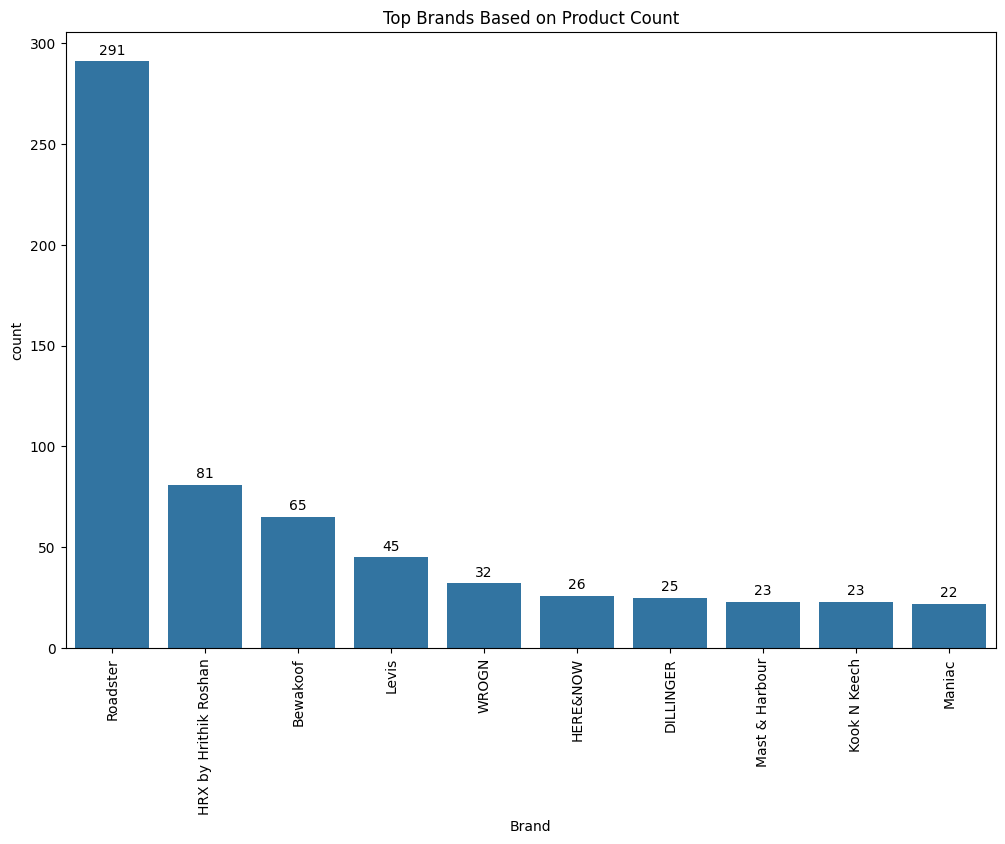

In [1060]:
# Count Plot for Top brands based on product count
plt.figure(figsize=(12, 8))
plt.title('Top Brands Based on Product Count')

# Count plot to visualize the distribution of the brand
plot = sns.countplot(x='product_name', data=df_eda, order=top_brand.index)

# Annotate the bars in the count plot with their respective counts
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center',
                  va='center', size=10,
                  xytext=(0, 8), textcoords='offset points')

plt.xlabel('Brand')
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.show()

### Frquency Distribution of Fabric 

In [1061]:
# Frequency distribution table for Fabric 
top_fabric = pd.crosstab(index=df_eda['fabric_material'],
                        columns='count').sort_values(by='count',
                                                     ascending=False).nlargest(10,'count')
top_fabric

col_0,count
fabric_material,
Cotton,673
Pure Cotton,431
Polyester,140
Nylon,5
Viscose Rayon,2
Polyester PU Coated,1
Synthetic,1


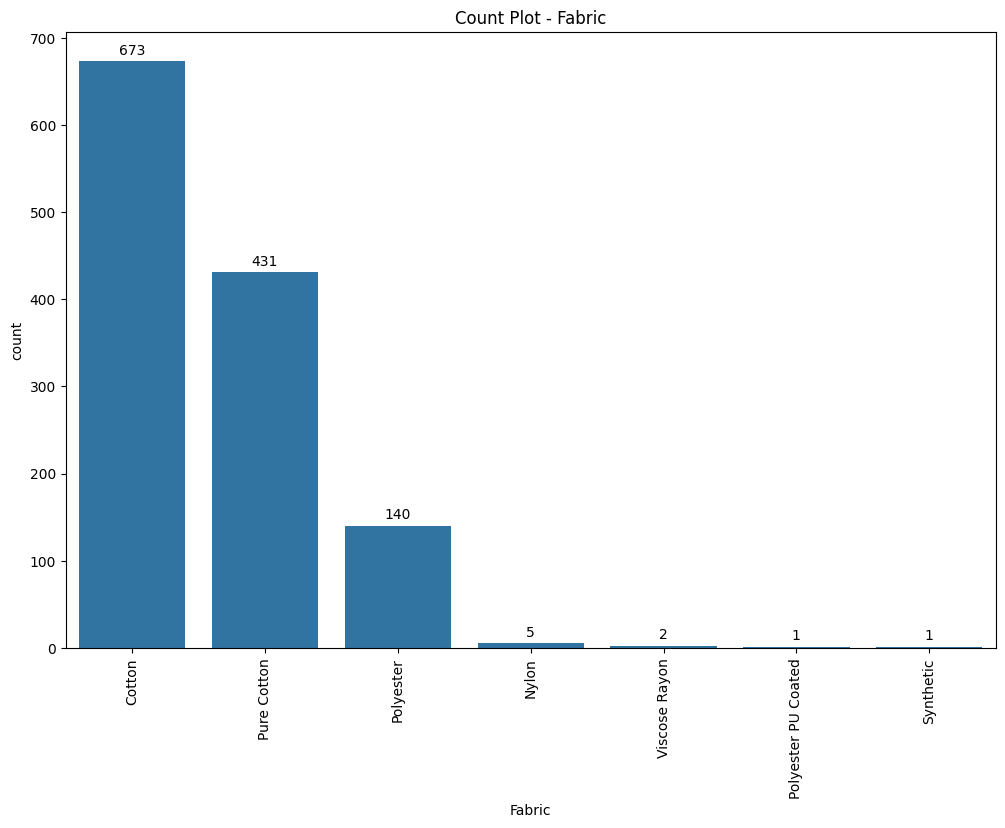

In [1062]:
# Count Plot for Fabric
plt.figure(figsize=(12, 8))
plt.title('Count Plot - Fabric')

# Count plot to visualize the distribution of fabric materials
plot = sns.countplot(x='fabric_material', data=df_eda, order=top_fabric.index)

# Annotate the bars in the count plot with their respective counts
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center',
                  va='center', size=10,
                  xytext=(0, 8), textcoords='offset points')

plt.xlabel('Fabric')
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.show()

### Frquency Distribution of Collar Type

In [1063]:
# Frequency distribution table for Collar Type
top_collar = pd.crosstab(index=df_eda['neck_type'],
                        columns='count').sort_values(by='count',
                                                     ascending=False).nlargest(10,'count')
top_collar

col_0,count
neck_type,
Round Neck,834
Polo Collar,318
V-Neck,32
Henley Neck,20
Mandarin Collar,17
High Neck,13
Hood,10
Turtle Neck,5
Scoop Neck,4


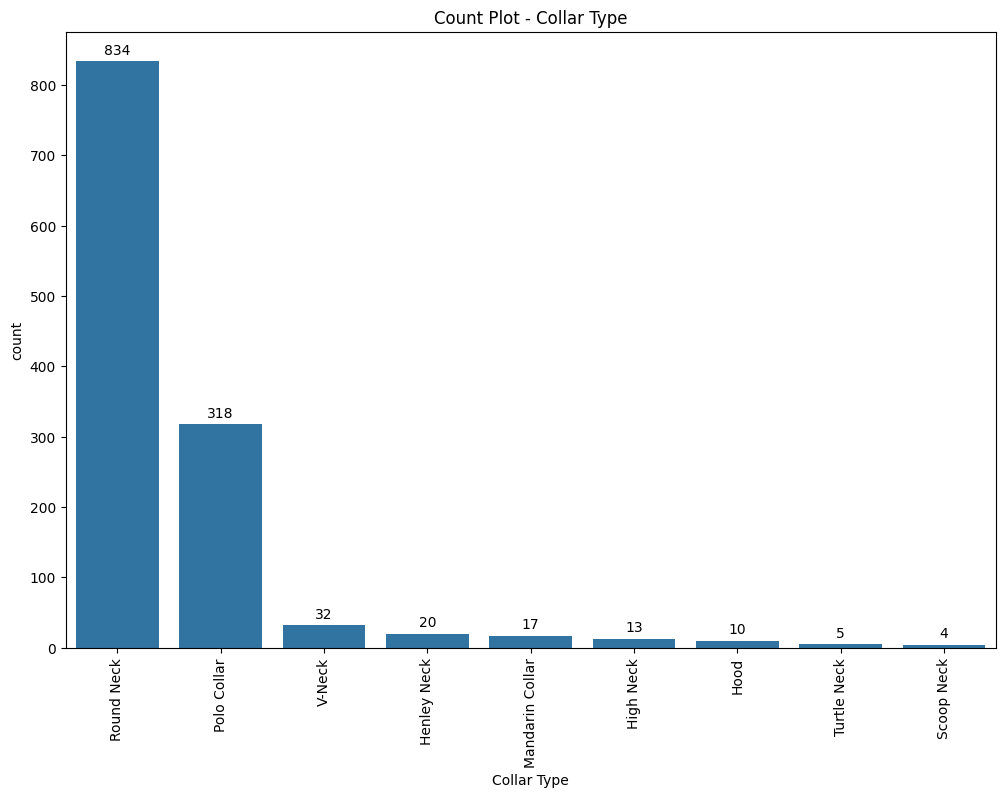

In [1064]:
# Count Plot for Collar Type
plt.figure(figsize=(12, 8))
plt.title('Count Plot - Collar Type')

# Count plot to visualize the distribution of the collar types
plot = sns.countplot(x='neck_type', data=df_eda, order=top_collar.index)

# Annotate the bars in the count plot with their respective counts
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center',
                  va='center', size=10,
                  xytext=(0, 8), textcoords='offset points')

plt.xlabel('Collar Type')
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.show()

### Joint Probability Table for Brands with different Collar Type

In [1065]:
# Joint Probability Table for Brands with different Collar Type

# Calculate the joint probability table using crosstab
brand_collar = (pd.crosstab(index=df_eda['product_name'],
                            columns=df_eda['neck_type'],
                            margins=True,
                            normalize='columns') * 100).sort_values(by='All', 
                                                                    ascending=False).nlargest(10, 'All')

# Display the Joint Probability Table
brand_collar


neck_type,Henley Neck,High Neck,Hood,Mandarin Collar,Polo Collar,Round Neck,Scoop Neck,Turtle Neck,V-Neck,All
product_name,,,,,,,,,,
Roadster,40.00,0.00,0.00,5.88,22.33,24.58,25.00,0.00,15.62,23.22
HRX by Hrithik Roshan,0.00,23.08,0.00,5.88,3.77,7.43,0.00,0.00,9.38,6.46
Bewakoof,0.00,0.00,0.00,0.00,0.00,7.67,0.00,0.00,3.12,5.19
Levis,0.00,0.00,0.00,0.00,0.63,4.80,0.00,0.00,9.38,3.59
WROGN,0.00,0.00,0.00,0.00,2.20,2.88,0.00,0.00,3.12,2.55
HERE&NOW,0.00,0.00,10.00,0.00,0.63,2.76,0.00,0.00,0.00,2.08
DILLINGER,0.00,0.00,0.00,0.00,2.20,2.16,0.00,0.00,0.00,2.00
Mast & Harbour,0.00,0.00,0.00,0.00,4.72,0.96,0.00,0.00,0.00,1.84
Kook N Keech,0.00,0.00,0.00,0.00,0.31,2.64,0.00,0.00,0.00,1.84


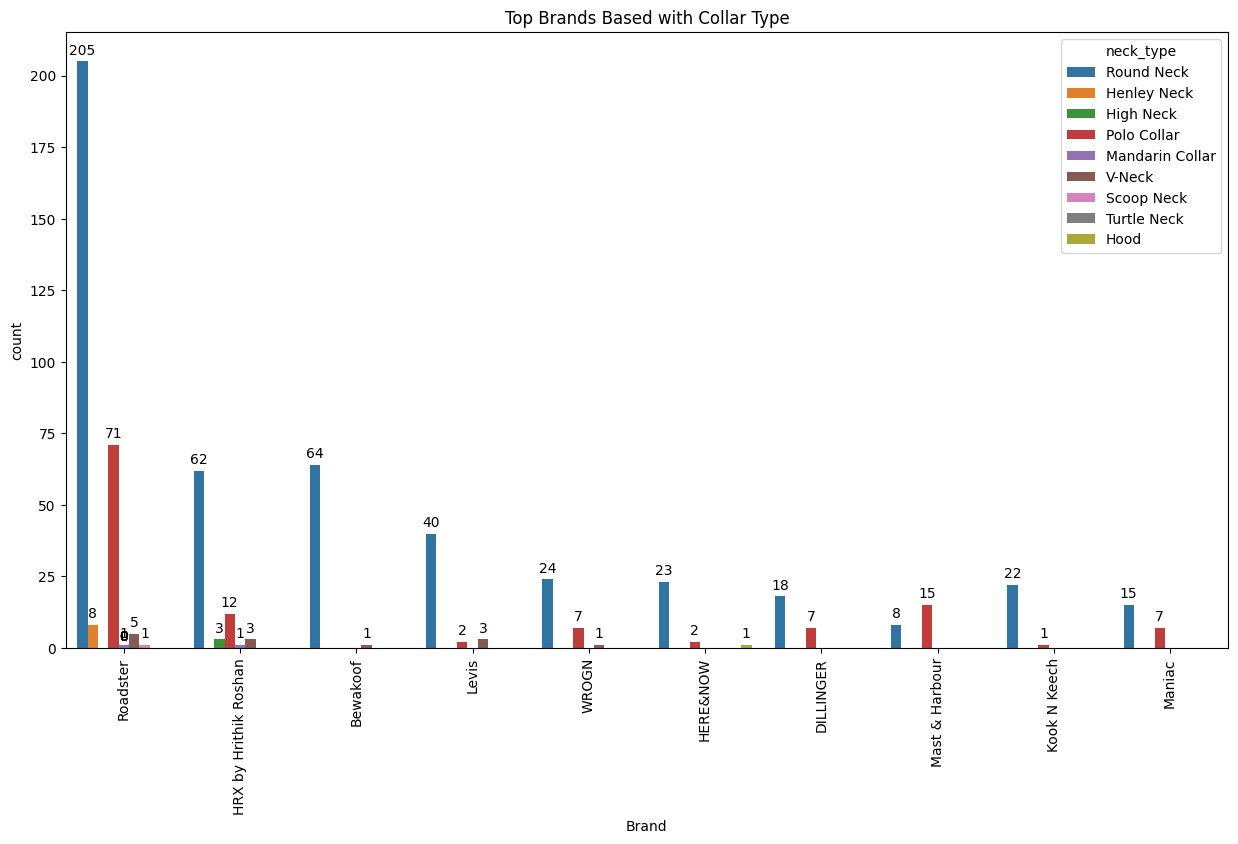

In [1066]:
# Count plot for Brands with different Collar Type
plt.figure(figsize=(15, 8))
plt.title('Top Brands Based with Collar Type')

# Count plot to visualize the distribution of the brand with respect to collar type
plot = sns.countplot(x='product_name', hue='neck_type', data=df_eda,
                     order=brand_collar.index)

# Annotate the bars in the count plot with their respective counts
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width()/2,
                   bar.get_height()), ha='center',
                  va='center', size=10,
                  xytext=(0, 8), textcoords='offset points')

plt.xlabel('Brand')
# Rotate x-axis labels
plt.xticks(rotation=90)
plt.show()

In [1067]:
import seaborn as sns
import matplotlib.pyplot as plt

### Count Plots for different Collar Types

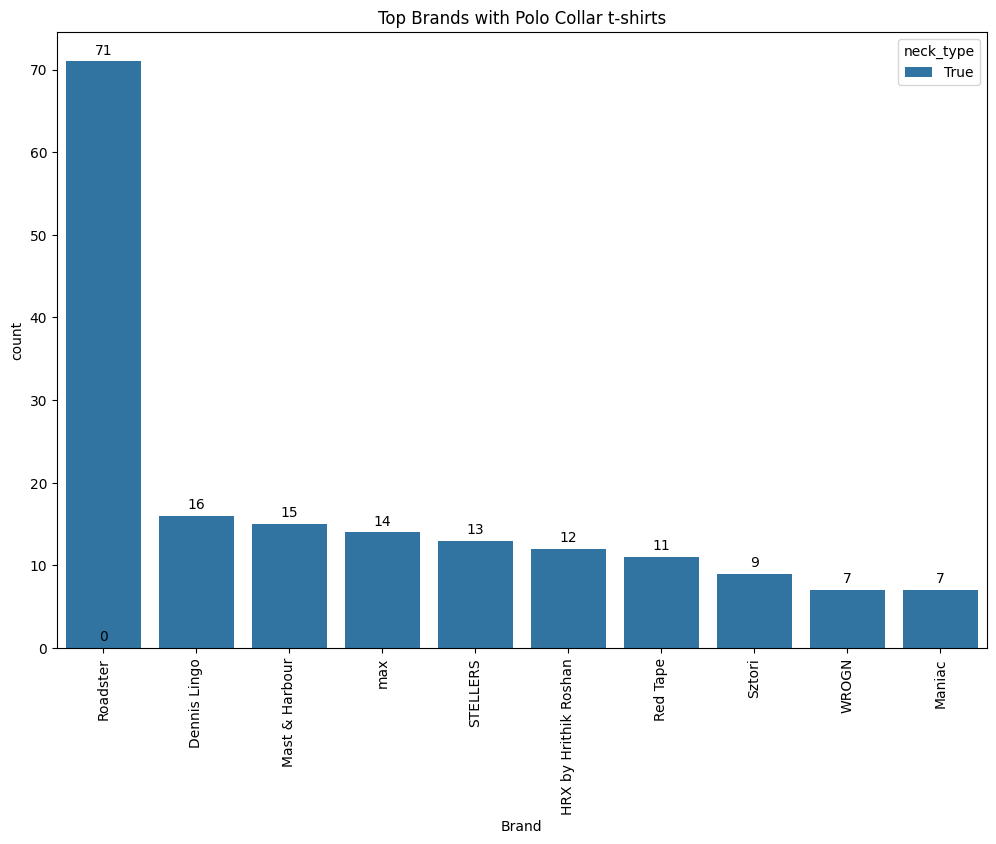

In [1068]:
# Calculate the top brands with 'Polo Collar' based on the count of each product
neck_polocollar = df_eda[df_eda['neck_type']=='Polo Collar']['product_name'].value_counts()
neck_polocollar = neck_polocollar.sort_values(ascending=False).nlargest(10)

# Plot for Top brands
plt.figure(figsize=(12,8))
plt.title('Top Brands with Polo Collar t-shirts')

# Count plot to visualize the distribution of the brand
plot = sns.countplot(x='product_name', data=df_eda, hue=df_eda['neck_type']=='Polo Collar',
                     hue_order=[True],
                     order=neck_polocollar.index)

# Annotate the bars in the count plot with their respective counts
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width()/2,
                   bar.get_height()), ha='center',
                    va='center', size=10,
                    xytext=(0,8), textcoords='offset points')

plt.xlabel('Brand')
# Rotate x-axis labels
plt.xticks(rotation=90)
plt.show()


In [1069]:
# Filter the DataFrame to include only 'Round Neck' neck_type and count the occurrences for each product
neck_roundneck = df_eda[df_eda['neck_type']=='Round Neck']['product_name'].value_counts().sort_values(ascending=False).nlargest(10)
neck_roundneck

product_name
Roadster                 205
Bewakoof                  64
HRX by Hrithik Roshan     62
Levis                     40
WROGN                     24
HERE&NOW                  23
Kook N Keech              22
Difference of Opinion     22
DILLINGER                 18
The Souled Store          17
Name: count, dtype: int64

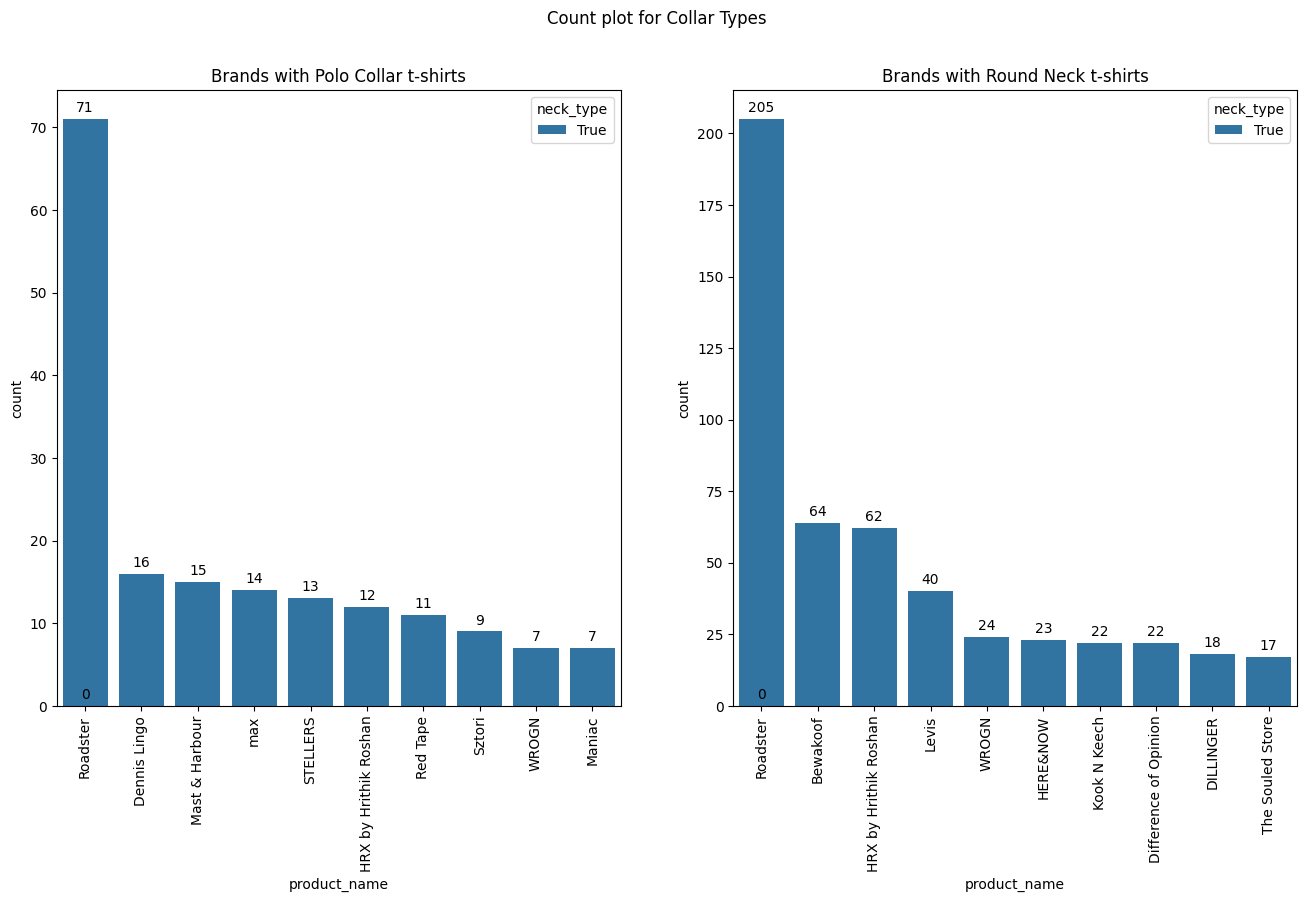

In [1070]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
plt.suptitle('Count plot for Collar Types')

# Count plot to visualize the distribution of the brand with Polo Collar t-shirts
plot = sns.countplot(x='product_name', data=df_eda, hue=df_eda['neck_type']=='Polo Collar',
                     hue_order=[True],
                     order=neck_polocollar.index, ax=axs[0])
axs[0].set_title('Brands with Polo Collar t-shirts')
axs[0].set_xticks(axs[0].get_xticks())
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)  # Rotating x-axis labels

# Annotate the bars in the count plot with their respective counts
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width()/2,
                   bar.get_height()), ha='center',
                  va='center', size=10,
                  xytext=(0, 8), textcoords='offset points')

# Count plot to visualize the distribution of the brand with Round Neck t-shirts
plot = sns.countplot(x='product_name', data=df_eda, hue=df_eda['neck_type']=='Round Neck',
                     hue_order=[True],
                     order=neck_roundneck.index, ax=axs[1])
axs[1].set_title('Brands with Round Neck t-shirts')
axs[1].set_xticks(axs[1].get_xticks())
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)  # Rotating x-axis labels

# Annotate the bars in the count plot with their respective counts
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width()/2,
                   bar.get_height()), ha='center',
                  va='center', size=10,
                  xytext=(0, 8), textcoords='offset points')

# Show the plot
plt.show()